# Exploring Ford GoBike System Data
by Salvador Rico

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
The information about the data can be found [here](https://www.lyft.com/bikes/bay-wheels/system-data) and the actual data can be found [here](https://s3.amazonaws.com/baywheels-data/index.html)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

I downloaded all the files from [here](https://s3.amazonaws.com/baywheels-data/index.html) and unzipped them. Below I used the folder where these files are located.

These are the files that I used:
- 201802-fordgobike-tripdata.csv
- 201909-baywheels-tripdata.csv
- 201811-fordgobike-tripdata.csv
- 201904-fordgobike-tripdata.csv
- 201809-fordgobike-tripdata.csv
- 201806-fordgobike-tripdata.csv
- 201907-baywheels-tripdata.csv
- 201903-fordgobike-tripdata.csv
- 201906-baywheels-tripdata.csv
- 201805-fordgobike-tripdata.csv
- 201908-baywheels-tripdata.csv
- 201812-fordgobike-tripdata.csv
- 201801-fordgobike-tripdata.csv
- 201905-baywheels-tripdata.csv
- 201901-fordgobike-tripdata.csv
- 201807-fordgobike-tripdata.csv
- 201808-fordgobike-tripdata.csv
- 201910-baywheels-tripdata.csv
- 201810-fordgobike-tripdata.csv
- 201803-fordgobike-tripdata.csv
- 201912-baywheels-tripdata.csv
- 201911-baywheels-tripdata.csv
- 201804-fordgobike-tripdata.csv
- 201902-fordgobike-tripdata.csv

In [2]:
import glob
import os

path = "/Users/salvarico/Dropbox/my_life/udacity/dand/communicate_data_findings/data/csv"
files = glob.glob(os.path.join(path, "*.csv"))

Lets see now how each of our datasets looks in terms of number of observations, number of columns and the name of our columns.

In [3]:
datasets = {}
nobs = 0
for f in files:
    datasets[f] = pd.read_csv(f, error_bad_lines=False, warn_bad_lines=False)
    print(f)
    print(datasets[f].columns)
    print(datasets[f].shape)
    nobs += datasets[f].shape[0]

# Now we check the total number of observations in our dataset
print(nobs)

/Users/salvarico/Dropbox/my_life/udacity/dand/communicate_data_findings/data/csv/201802-fordgobike-tripdata.csv
Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip'],
      dtype='object')
(106718, 14)
/Users/salvarico/Dropbox/my_life/udacity/dand/communicate_data_findings/data/csv/201909-baywheels-tripdata.csv
Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip'],
      dtype='object')
(217986, 14)
/Users/salvarico/Dropbox/my_life/udacity/dand/communicate_data_findings/data/csv/2018

/Users/salvarico/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/salvarico/Dropbox/my_life/udacity/dand/communicate_data_findings/data/csv/201907-baywheels-tripdata.csv
Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip', 'rental_access_method'],
      dtype='object')
(258102, 15)
/Users/salvarico/Dropbox/my_life/udacity/dand/communicate_data_findings/data/csv/201903-fordgobike-tripdata.csv
Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip'],
      dtype='object')
(256299, 14)


/Users/salvarico/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/salvarico/Dropbox/my_life/udacity/dand/communicate_data_findings/data/csv/201906-baywheels-tripdata.csv
Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip', 'rental_access_method'],
      dtype='object')
(191772, 15)
/Users/salvarico/Dropbox/my_life/udacity/dand/communicate_data_findings/data/csv/201805-fordgobike-tripdata.csv
Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip'],
      dtype='object')
(179125, 14)
/Users/salvarico/Dropbox/my_life/udacity/dand/communicate_dat

So we see that all datasets have the same first 14 columns and a few of them have an extra variable which is rental_access_method in the final column. To avoid having a lot of null values for the rest of the observations in this variable I decided to remove this. So I will rerun this removing this column.

In [4]:
datasets = {}
for f in files:
    datasets[f] = pd.read_csv(f, error_bad_lines=False, warn_bad_lines=False, usecols=[x for x in range(14)])

/Users/salvarico/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
raw_df = pd.concat(datasets, ignore_index = True)
print(raw_df.shape)
raw_df.head()

(4370704, 14)


duration_sec                start_time                  end_time  \
0           598  2018-02-28 23:59:47.0970  2018-03-01 00:09:45.1870   
1           943  2018-02-28 23:21:16.4950  2018-02-28 23:36:59.9740   
2         18587  2018-02-28 18:20:55.1900  2018-02-28 23:30:42.9250   
3         18558  2018-02-28 18:20:53.6210  2018-02-28 23:30:12.4500   
4           885  2018-02-28 23:15:12.8580  2018-02-28 23:29:58.6080   

   start_station_id                                 start_station_name  \
0             284.0  Yerba Buena Center for the Arts (Howard St at ...   
1               6.0                      The Embarcadero at Sansome St   
2              93.0                       4th St at Mission Bay Blvd S   
3              93.0                       4th St at Mission Bay Blvd S   
4             308.0                                   San Pedro Square   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.784872              -122.400876           114.0   
1               37.804770              -122.403234           324.0   
2               37.770407              -122.391198            15.0   
3               37.770407              -122.391198            15.0   
4               37.336802              -121.894090           297.0   

                                    end_station_name  end_station_latitude  \
0                         Rhode Island St at 17th St             37.764478   
1                Union Square (Powell St at Post St)             37.788300   
2  San Francisco Ferry Building (Harry Bridges Pl...             37.795392   
3  San Francisco Ferry Building (Harry Bridges Pl...             37.795392   
4                              Locust St at Grant St             37.322980   

   end_station_longitude  bike_id   user_type bike_share_for_all_trip  
0            -122.402570     1035  Subscriber                      No  
1            -122.408531     1673    Customer                      No  
2            -122.394203     3498    Customer                      No  
3            -122.394203     3129    Customer                      No  
4            -121.887931     1839  Subscriber                     Yes

In [6]:
raw_df.to_csv('all_rides.csv', index = False)

In [7]:
# Lets check if this worked

raw_df.sample(20)

duration_sec                start_time                  end_time  \
3176300           772  2019-10-30 21:11:41.8090  2019-10-30 21:24:33.9100   
4192251           414  2019-02-28 14:28:16.5450  2019-02-28 14:35:11.3490   
653849            551  2019-04-05 13:36:19.4010  2019-04-05 13:45:30.9450   
2914990          1118  2018-07-11 09:12:48.3340  2018-07-11 09:31:27.0320   
2752985           659  2019-01-06 11:31:37.4020  2019-01-06 11:42:36.5280   
2103771          1397  2019-08-12 12:00:05.2960  2019-08-12 12:23:23.2430   
3997689          1155  2019-11-08 17:21:14.5220  2019-11-08 17:40:30.0440   
3174306          1308  2019-10-31 08:29:28.4430  2019-10-31 08:51:16.4830   
1298504           948       2019-07-26 08:11:41       2019-07-26 08:27:29   
721694            646  2018-09-26 22:47:48.8110  2018-09-26 22:58:34.9590   
4074943           955  2018-04-27 06:46:19.9640  2018-04-27 07:02:15.7340   
4024597           146  2019-11-05 13:34:38.0400  2019-11-05 13:37:04.3360   
395693            470  2018-11-12 07:33:55.2750  2018-11-12 07:41:46.1810   
3602362          1227  2018-10-01 19:37:39.8890  2018-10-01 19:58:07.7290   
2908357           308  2018-07-12 08:03:11.5940  2018-07-12 08:08:20.3210   
3988285          1653  2019-11-10 18:07:42.8660  2019-11-10 18:35:16.5730   
3744175           516  2019-12-19 23:31:35.8030  2019-12-19 23:40:12.2810   
4025904          1489  2019-11-05 09:20:33.8880  2019-11-05 09:45:22.9240   
528977           1307  2019-04-19 16:34:12.1530  2019-04-19 16:55:59.9520   
1007963          1588  2018-06-12 16:25:41.4730  2018-06-12 16:52:09.8590   

         start_station_id                                 start_station_name  \
3176300             176.0                             MacArthur BART Station   
4192251             270.0                              Ninth St at Heinz Ave   
653849                5.0       Powell St BART Station (Market St at 5th St)   
2914990             127.0                             Valencia St at 21st St   
2752985             187.0                                 Jack London Square   
2103771               7.0                                Frank H Ogawa Plaza   
3997689              17.0   Embarcadero BART Station (Beale St at Market St)   
3174306              72.0                                Page St at Scott St   
1298504               NaN                                                NaN   
721694               75.0                           Market St at Franklin St   
4074943             119.0                                  18th St at Noe St   
4024597             239.0                      Bancroft Way at Telegraph Ave   
395693              133.0                             Valencia St at 22nd St   
3602362              44.0  Civic Center/UN Plaza BART Station (Market St ...   
2908357             243.0                        Bancroft Way at College Ave   
3988285             323.0                                 Broadway at Kearny   
3744175              74.0                              Laguna St at Hayes St   
4025904             104.0                                  4th St at 16th St   
528977              130.0                           22nd St Caltrain Station   
1007963              44.0  Civic Center/UN Plaza BART Station (Market St ...   

         start_station_latitude  start_station_longitude  end_station_id  \
3176300               37.828410              -122.266315           171.0   
4192251               37.853489              -122.289415           351.0   
653849                37.783899              -122.408445            30.0   
2914990               37.756708              -122.421025            10.0   
2752985               37.796248              -122.279352           183.0   
2103771               37.804562              -122.271738           186.0   
3997689               37.792251              -122.397086           115.0   
3174306               37.772406              -122.435650            16.0   
1298504               37.7

Lets check now how many null values we have in each variable

In [8]:
raw_df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            92505
start_station_name          91904
start_station_latitude          0
start_station_longitude         0
end_station_id              94673
end_station_name            94121
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
bike_share_for_all_trip    101066
dtype: int64

So out of the 4'343,023 observations in these variables we have all these null values. There are actually not that many missing values since at most we have 101,066 out of 4'343,023 observations.

Lets now look how many duplicated observations do we have.

In [9]:
raw_df.duplicated().sum()

0

Now lets create a copy of our dataset and make changes in the copy

In [10]:
tidy_df = raw_df.copy()

In [11]:
tidy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370704 entries, 0 to 4370703
Data columns (total 14 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(6), int64(2), object(6)
memory usage: 466.8+ MB


Above we can see that our start_time and end_time are object (strings) but they should be a datetime variable, user_type and bike_share_for_all_trip should be a category and bike_id, start_station_id and end_station should be strings and not float64 types. So lets make these changes

In [12]:
# Strings to datetimes

tidy_df.start_time = pd.to_datetime(tidy_df.start_time)
tidy_df.end_time = pd.to_datetime(tidy_df.end_time)

In [13]:
# Strings to category type

tidy_df.user_type = tidy_df.user_type.astype('category')

In [14]:
# Changing the bike_id, start_station_id, and end_station_id to object

tidy_df.bike_id = tidy_df.bike_id.astype(str)
tidy_df.start_station_id = tidy_df.start_station_id.astype(str)
tidy_df.end_station_id = tidy_df.end_station_id.astype(str)

In [15]:
# Start time month (January - December)

tidy_df['start_time_month'] = tidy_df['start_time'].dt.strftime('%B')

In [16]:
# Start time weekday

tidy_df['start_time_weekday'] = tidy_df['start_time'].dt.strftime('%a')

In [17]:
# Start and end time hour

tidy_df['start_time_hour'] = tidy_df['start_time'].dt.hour
tidy_df['end_time_hour'] = tidy_df['end_time'].dt.hour

In [18]:
# Duration in seconds to duration in minutes

tidy_df['duration_min'] = tidy_df['duration_sec']/60
tidy_df['duration_min'] = tidy_df['duration_min'].astype(int)

In [19]:
tidy_df.sample(20)

duration_sec              start_time                end_time  \
771009            157 2018-09-19 15:59:04.425 2018-09-19 16:01:41.791   
2582450          1255 2019-05-01 08:49:57.588 2019-05-01 09:10:52.873   
2414644           112 2019-05-30 08:58:51.459 2019-05-30 09:00:43.649   
2583546           328 2019-05-01 07:57:55.873 2019-05-01 08:03:24.052   
4219389           264 2019-02-24 15:14:21.873 2019-02-24 15:18:46.273   
1380886           922 2019-03-27 07:36:26.540 2019-03-27 07:51:49.530   
92436            1871 2018-02-04 23:56:24.622 2018-02-05 00:27:35.928   
2201238           633 2018-12-22 11:16:11.478 2018-12-22 11:26:45.455   
1937365           625 2018-05-05 14:58:17.008 2018-05-05 15:08:42.440   
855249           1843 2018-09-06 15:49:50.809 2018-09-06 16:20:34.147   
3857443          3896 2019-12-06 08:42:20.000 2019-12-06 09:47:17.000   
2688135           876 2019-01-18 07:57:54.182 2019-01-18 08:12:30.577   
2870128            65 2018-07-17 21:00:38.941 2018-07-17 21:01:44.142   
133110            628 2019-09-26 19:10:47.956 2019-09-26 19:21:16.224   
1523208           342 2019-03-11 13:41:54.560 2019-03-11 13:47:36.983   
2883800           441 2018-07-16 08:33:40.232 2018-07-16 08:41:02.047   
27645             578 2018-02-21 08:34:45.516 2018-02-21 08:44:23.609   
3155291           626 2018-08-02 17:56:51.068 2018-08-02 18:07:17.500   
3184110           472 2019-10-30 07:19:11.084 2019-10-30 07:27:03.156   
2368430          1086 2018-01-13 18:57:08.702 2018-01-13 19:15:15.452   

        start_station_id                                 start_station_name  \
771009             241.0                                 Ashby BART Station   
2582450            386.0                             24th St at Bartlett St   
2414644             11.0                             Davis St at Jackson St   
2583546             25.0                                Howard St at 2nd St   
4219389            381.0                              20th St at Dolores St   
1380886            118.0                    Eureka Valley Recreation Center   
92436              127.0                             Valencia St at 21st St   
2201238            371.0                         Lombard St at Columbus Ave   
1937365            183.0                           Telegraph Ave at 19th St   
855249              44.0  Civic Center/UN Plaza BART Station (Market St ...   
3857443              nan                                                NaN   
2688135             71.0                             Broderick St at Oak St   
2870128             67.0  San Francisco Caltrain Station 2  (Townsend St...   
133110             355.0                            23rd St at Tennessee St   
1523208             21.0   Montgomery St BART Station (Market St at 2nd St)   
2883800            315.0                               Market St at 45th St   
27645               16.0                            Steuart St at Market St   
3155291             66.0                              3rd St at Townsend St   
3184110             41.0                         Golden Gate Ave at Polk St   
2368430             70.0                             Central Ave at Fell St   

         start_station_latitude  start_station_longitude end_station_id  \
771009                37.852477              -122.270213          272.0   
2582450               37.752105              -122.419724           21.0   
2414644               37.797280              -122.398436            9.0   
2583546               37.786928              -122.398113          284.0   
4219389               37.758238              -122.426094          123.0   
1380886               37.759177              -122.436943           90.0   
92436                 37.756708              -122.421025           52.0   
2201238               37.802746              -122.413579            5.0   
1937365               37.808702              -122.269927          202.0   
855249                37.781074              -122.411738         

In [20]:
from math import cos, asin, sqrt

# From https://stackoverflow.com/a/21623206/2138967

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295     #Pi/180
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12742 * asin(sqrt(a))

In [21]:
# Lets now create a variable with the distance from start station to end station

tidy_df['distance_km'] = tidy_df.apply(lambda x: distance(x['start_station_latitude'], x['start_station_longitude'], x['end_station_latitude'], x['end_station_longitude']), axis=1)

In [22]:
tidy_df.sample(20)

duration_sec              start_time                end_time  \
1632335           372 2019-06-25 00:00:42.209 2019-06-25 00:06:54.794   
4295736           568 2019-02-13 08:12:24.064 2019-02-13 08:21:52.734   
4270114           681 2019-02-18 08:55:33.533 2019-02-18 09:06:55.005   
2898641           275 2018-07-13 10:34:49.951 2018-07-13 10:39:25.099   
1968571           735 2019-08-31 10:58:59.598 2019-08-31 11:11:15.242   
3152507           254 2018-08-03 08:17:21.808 2018-08-03 08:21:36.573   
1528139           192 2019-03-10 19:42:47.884 2019-03-10 19:46:00.277   
1283837           374 2019-07-30 09:52:46.000 2019-07-30 09:59:01.000   
3840738           522 2019-12-02 08:56:21.604 2019-12-02 09:05:04.362   
2461792           295 2019-05-22 06:35:39.628 2019-05-22 06:40:34.703   
1340829          3270 2019-03-31 15:32:19.444 2019-03-31 16:26:50.295   
811078            908 2018-09-13 09:09:36.529 2018-09-13 09:24:45.510   
1584434          1072 2019-03-02 12:59:28.458 2019-03-02 13:17:20.532   
693998           1170 2019-04-01 11:33:29.257 2019-04-01 11:53:00.075   
2727549           306 2019-01-10 15:00:21.933 2019-01-10 15:05:28.265   
2366117           494 2018-01-15 09:06:42.867 2018-01-15 09:14:57.849   
696523           1049 2019-04-01 08:09:37.128 2019-04-01 08:27:06.878   
2909264           261 2018-07-11 22:28:51.330 2018-07-11 22:33:12.787   
4018111           847 2019-11-06 08:39:52.010 2019-11-06 08:53:59.695   
3966373           254 2019-11-13 16:46:08.473 2019-11-13 16:50:23.214   

        start_station_id                                 start_station_name  \
1632335             22.0                              Howard St at Beale St   
4295736             81.0                                 Berry St at 4th St   
4270114            242.0                              Milvia St at Derby St   
2898641             14.0                              Clay St at Battery St   
1968571            327.0                          5th St at San Salvador St   
3152507             33.0                         Golden Gate Ave at Hyde St   
1528139            310.0                          San Fernando St at 4th St   
1283837              nan                                                NaN   
3840738            323.0                                 Broadway at Kearny   
2461792            312.0                           San Jose Diridon Station   
1340829            150.0                              Adeline St at 40th St   
811078              15.0  San Francisco Ferry Building (Harry Bridges Pl...   
1584434             54.0             Alamo Square (Steiner St at Fulton St)   
693998             167.0                         College Ave at Harwood Ave   
2727549             33.0                         Golden Gate Ave at Hyde St   
2366117             81.0                                 Berry St at 4th St   
696523              22.0                              Howard St at Beale St   
2909264             87.0                               Folsom St at 13th St   
4018111             52.0                          McAllister St at Baker St   
3966373            242.0                              Milvia St at Derby St   

         start_station_latitude  start_station_longitude end_station_id  \
1632335               37.789756              -122.394643          284.0   
4295736               37.775880              -122.393170           19.0   
4270114               37.860125              -122.269384          256.0   
2898641               37.795001              -122.399970          284.0   
1968571               37.332039              -121.881766          314.0   
3152507               37.781650              -122.415408           59.0   
1528139               37.335885              -121.885660          317.0   
1283837               37.773519              -122.410956            nan   
3840738               37.798014              -122.405950           17.0   
2461792               37.329732              -121.901782         

In [23]:
tidy_df.to_csv('tidy_all_rides.csv', index = False)

### What is the structure of your dataset?

The Ford GoBike System Data contains all observations of bike sharing rides in the greater San Francisco Bay Area. Looking at the data, it seems to make all sense. There doesn't seem to be something strange or some sample wrongly registered. The data contains all rides from years 2018 and 2019.

The raw data contains the following columns:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Bike Share for all Trip
    
And the tidy data has these additional variables:	
- Start Time Month	
- Start Time Day of the Week	
- Start Time Hour
- End Time Hour
- Distance(km)

### What is/are the main feature(s) of interest in your dataset?

I would like to understand a bit about the patterns in terms of days in the week or in the year when rides are more frequent. Also to check at which time in the day is more common to have rides and also how all this relates with the user type.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- trip duration
- start time and date
- end time and date
- start station latitude
- Start Station Longitude
- End Station Latitude
- End Station Longitude
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

## Univariate Exploration


Lets check the monthly usage of the rides

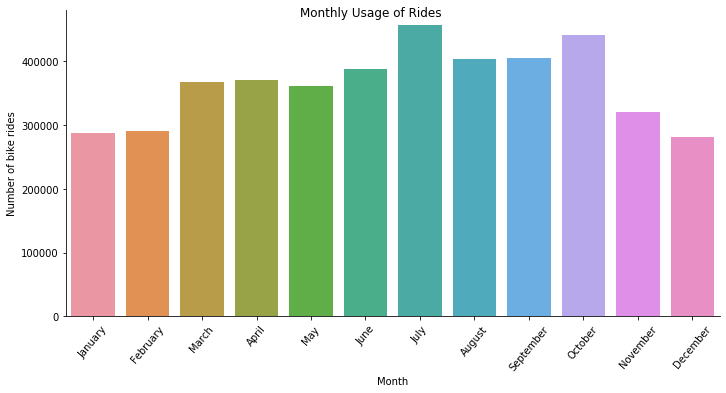

In [24]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
graph = sb.catplot(data = tidy_df, x = 'start_time_month', kind = 'count', order = order, aspect = 2);
graph.set_axis_labels('Month', 'Number of bike rides'),
graph.fig.suptitle('Monthly Usage of Rides');
graph.set_xticklabels(rotation=50);

We can see from above that the distribution of rides by month is not very uneven but it's clearly less frequent during the winter months since it's cold and makes sense that people use it less often. The months were we have more frequent rides are the most warm months like July.

Lets check the usage of the rides by weekday

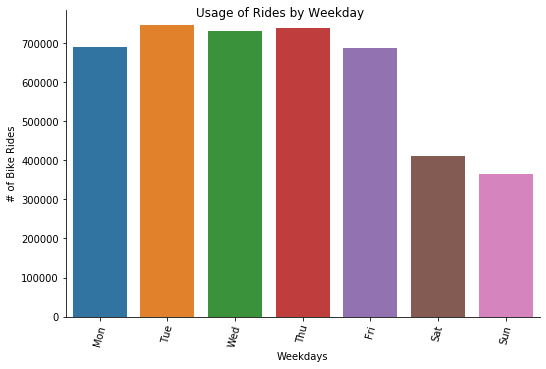

In [25]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph = sb.catplot(data=tidy_df, x='start_time_weekday', kind='count', order = weekday, aspect=1.5)
graph.set_axis_labels('Weekdays', '# of Bike Rides')
graph.fig.suptitle('Usage of Rides by Weekday');
graph.set_xticklabels(rotation=75);

It can clearly be seen that there is a big difference between the rides during the workweek and the rides during the weekend. This makes sense since during the weekends less people have to go to work or study as they do during the workweek.

Something else to notice is that the frequency of rides during Monday and Friday is less than during Tuesday-Thursday. My guess is that this has to do with the fact that people try to take their vacation days in these days in order to connect those days with the weekend.

Lets check the usage of the rides per hour

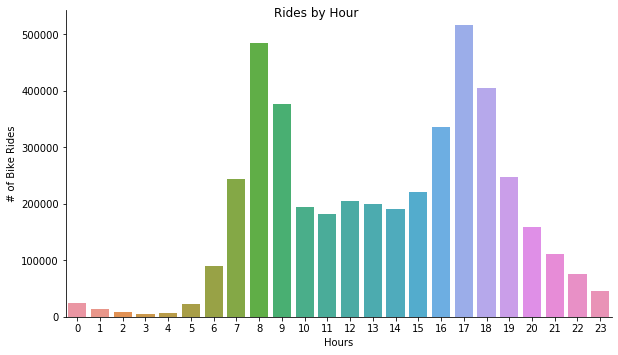

In [26]:
graph = sb.catplot(data = tidy_df, x='start_time_hour', kind='count', aspect = 1.7)
graph.set_axis_labels('Hours', '# of Bike Rides')
graph.fig.suptitle('Rides by Hour');

There is clearly a high usage during the peak hours when people go to school or work or they commute from it to home.

Lets check the bike rides distributed by duration (in minutes)

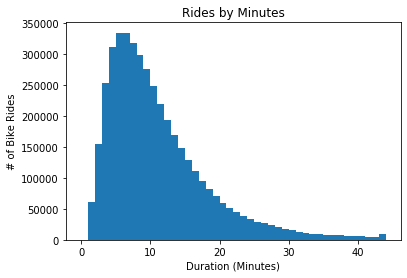

In [27]:
bin_edges = np.arange(0, 45, 1)

plt.hist(data = tidy_df, x = 'duration_min', bins = bin_edges);

plt.title("Rides by Minutes")
plt.xlabel('Duration (Minutes)')
plt.ylabel('# of Bike Rides');

In [28]:
tidy_df.duration_min.describe()

count    4.370704e+06
mean     1.332226e+01
std      3.587568e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.520100e+04
Name: duration_min, dtype: float64

From the describe function and the graph we can see that there is a big tail on the right side of the distribution and on average each ride takes about 13.3 minutes and the median is of 9 minutes.

Lets check the bike rides distributed by distance (in kms)

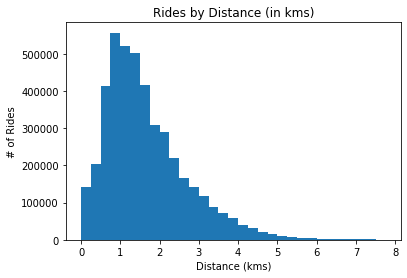

In [29]:
bin_edges = np.arange(0, 8, 0.25)
plt.hist(data = tidy_df, x = 'distance_km', bins = bin_edges);
plt.title("Rides by Distance (in kms)")
plt.xlabel('Distance (kms)')
plt.ylabel('# of Rides');

In [30]:
tidy_df.distance_km.describe()

count    4.370704e+06
mean     1.921914e+00
std      5.869999e+01
min      0.000000e+00
25%      8.980624e-01
50%      1.413548e+00
75%      2.171534e+00
max      1.279973e+04
Name: distance_km, dtype: float64

From the describe function and the graph we can see that there is a big tail on the right side of the distribution and on average in each ride bikers travel an average distance of 1.92 kilometers and a median of 1.41 kilometers. Almost all rides traveled less than 4 kms.

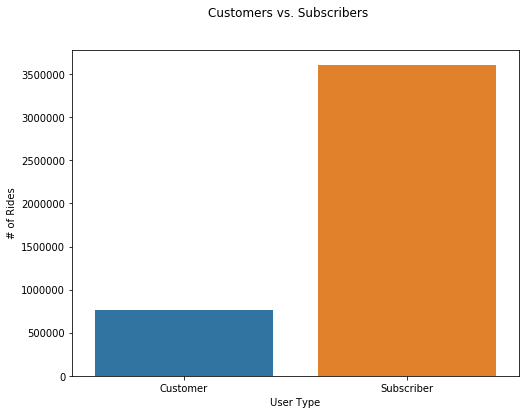

In [31]:
# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [8, 6])

graph = sb.countplot(data = tidy_df, x = "user_type");
graph.set_xlabel('User Type');
graph.set_ylabel('# of Rides');
plt.suptitle('Customers vs. Subscribers');

Most of the users are subscribers. It makes sense since we saw that many rides could be from people commuting to work or school and these users will probably save money if they subscribe. In general makes sense that people that use the service frequently will prefer subscribing.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

No transformation was needed and all variables seemed to make sense. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Just some changes to make it visualize it better for example creating the duration and then converting it to minutes in order to have something easier to analyze. 

## Bivariate Exploration

Lets see the distribution of rides by month separated by type of user

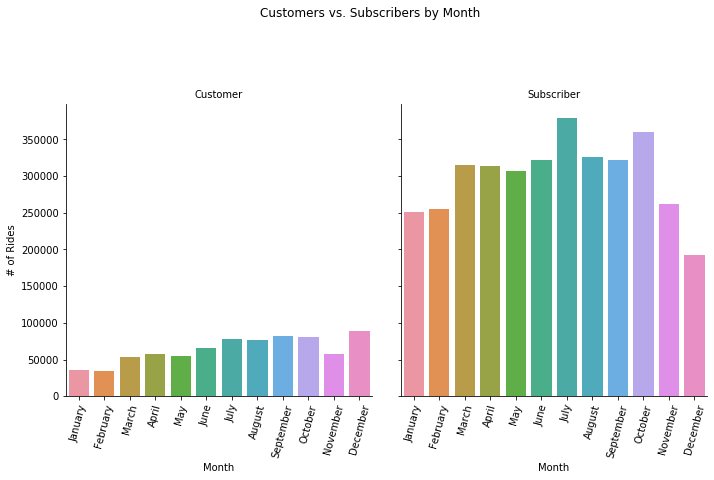

In [32]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
graph = sb.catplot(data=tidy_df, x='start_time_month', col="user_type", kind='count', order=order);
graph.set_axis_labels("Month", "# of Rides");
graph.set_titles("{col_name}");
graph.fig.suptitle('Customers vs. Subscribers by Month', y=1.2);
graph.set_xticklabels(rotation=75);

Here we can see that the distributions are quite different. The most noticeable thing is that December is the month of less frequent rides among subscribers but the month of most frequent rides among customers. This might possibly be explained by the profile of the users. Maybe customers are tourist or people that are just enjoying the holidays but don't usually ride the bikes and on the other side subscribers could just be on holidays and not at school or work and maybe that's why they use it less often.

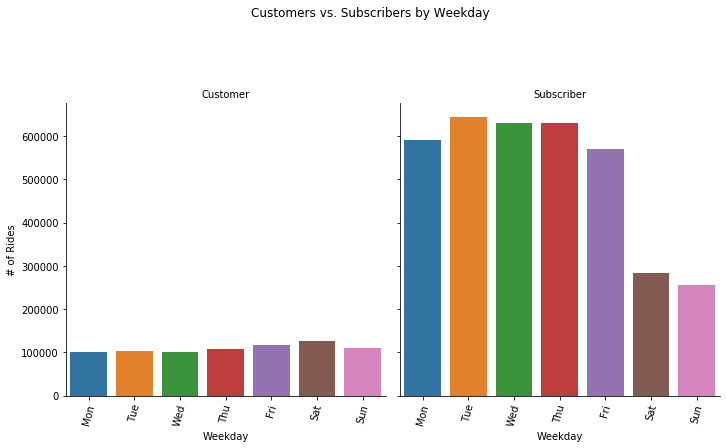

In [33]:
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph = sb.catplot(data=tidy_df, x='start_time_weekday', col="user_type", kind='count', order=order);
graph.set_axis_labels("Weekday", "# of Rides");
graph.set_titles("{col_name}");
graph.fig.suptitle('Customers vs. Subscribers by Weekday', y=1.2);
graph.set_xticklabels(rotation=75);

Again the distributions of rides by weekday are very different between customers and subscribers. This seems to reinforce the hypothesis that subscribers are mainly people that use the service for work or school. During the workweek subscribers use the service much more often than during the weekends whereas in the case of customers they use it more or less equal and even a bit more during Friday-Sunday. This could be due to the fact that there are more turists during weekends.

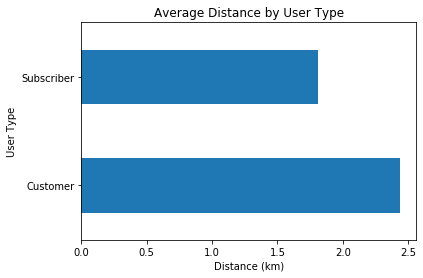

In [38]:
# Customer Usage by Distance vs. Subscriber Usage by Distance
plt = tidy_df.groupby('user_type')['distance_km'].mean().plot(kind='barh');
plt.set_title('Average Distance by User Type')
plt.set_xlabel('Distance (km)')
plt.set_ylabel('User Type');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are huge differences in the patterns of use between customers and subscribers. The number of rides vary a lot depending on the type of user either analyzed by weekday or month. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

On average customers travel a larger distance for each ride. A possible explaination is that many customers might be tourists that are using it for recreational purposes and they have time to ride the bike in longer distances whereas subscribers more frequently just want to get to their work or school.

## Multivariate Exploration

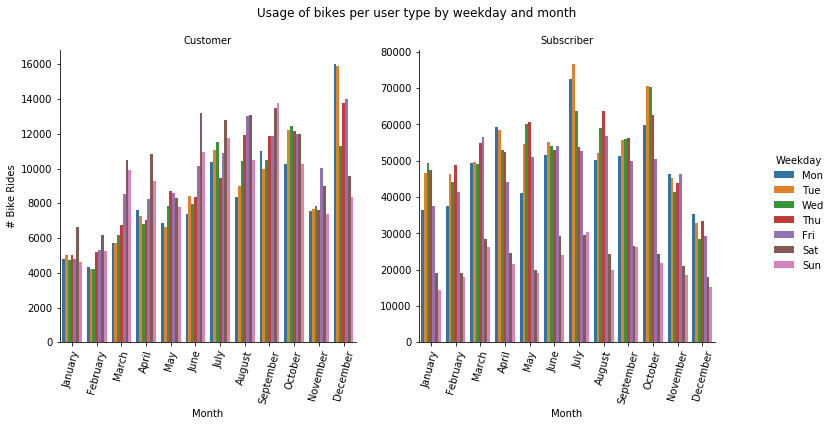

In [56]:
hue_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
g = sb.catplot(data=tidy_df, x='start_time_month', col="user_type", hue="start_time_weekday", hue_order = hue_order, order=order, kind='count', sharey = False)
g.set_axis_labels("Month", "# Bike Rides")
g._legend.set_title('Weekday')
g.set_titles("{col_name}", fontsize=0.2)
g.set_xticklabels(rotation=75);
g.fig.suptitle('Usage of bikes per user type by weekday and month', y=1.05);

Here we can see that the distributions vary a lot depending of the user type. This graph reinforces even more the hypothesis that many customers are tourists (either locals in holidays or people from other city/country). We can see that because the distribution of bike rides thorugh the weekdays varies a lot depending on the month in the case of customers. You can see that in the months of holidays (July and December) there is a lot of usage during the workweek which suggests that people that probably don't use the service often are using it a lot more in those months.

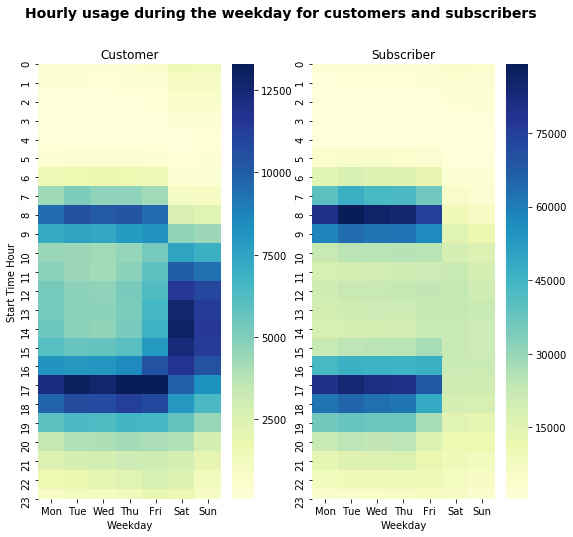

In [59]:
# Setting the weekday order
tidy_df['start_time_weekday'] = pd.Categorical(tidy_df['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = tidy_df.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="YlGnBu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = tidy_df.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap="YlGnBu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

Here we can also see a very intersting pattern. Customers tend to use the service a lot during peak hours in the workweek and in the hours around the afternoon during the weekends. A possible explaination is that during the peak hours of the weekwork we just need that some of the employees and students that don't use the service regularly take the rides to have this pattern. During the weekends it can simply be explained by recreational users that will use the service mainly during the hours where people typically enjoy their free time.

In the case of subscribers by far their main use is during the peak hours of the weekwork which is when people that regularly use the service will probably need it for going to their jobs or school.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Sure. Definitely each of these graphs reinforces the general hypothesis that customers are more like recreational users and suscribers tend to be people that use them to go to work or school. But the last (multivariate explorations) help us get even more detail about the patterns of use and the differences between customers and suscribers.

### Were there any interesting or surprising interactions between features?

Sure. For both types of users the distribution of rides during the weekdays depends a lot on the hour of the day and the month of the year.

## Sources

https://stackoverflow.com/a/21623206/2138967